# **Movie Genre Classification**
**by Samuel Lunghe**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import the Datasets**
train_data.txt, and test_data.txt

In [2]:
import pandas as pd
filepath = "/content/drive/MyDrive/ColabNotebooks/CODSOFT/MOVIE_CLASSIFICATION/Genre Classification Dataset/"

# File names for train and test datasets
train_file = "train_data.txt"
test_file = "test_data.txt"
train_path = filepath + train_file
test_path = filepath + test_file
# Read train data from text file into a pandas dataframe
train_df = pd.read_csv(train_path, delimiter=':::', header=None, names=['ID', 'Title', 'Genre', 'Description'])

# Read test data from text file into a pandas dataframe
test_df = pd.read_csv(test_path, delimiter=':::', header=None, names=['ID', 'Title','Description'])

<ipython-input-2-6d0188388f26>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df = pd.read_csv(train_path, delimiter=':::', header=None, names=['ID', 'Title', 'Genre', 'Description'])
<ipython-input-2-6d0188388f26>:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df = pd.read_csv(test_path, delimiter=':::', header=None, names=['ID', 'Title','Description'])


In [3]:
print("Train Data:")
train_df.head()

Train Data:


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
copy_train_df=train_df.copy()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [5]:
print("\nTest Data:")
test_df.head()


Test Data:


,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


# **Data Preprocessing**

## **>> Cheking and Handling Missing Values**

In [7]:
def check_missing_values(data):
    # Check for missing values
    missing_values = data.isnull().sum()

    # Print missing values for each column
    print("Missing Values:")
    for col, count in missing_values.items():
        if count > 0:
            print(f"{col}: {count} missing values")
        else:
            print(f"{col}: No missing values")

# Example usage:
# Assuming 'data' is your DataFrame
print("Train Data Missing Values")
print("-"*30)
check_missing_values(train_df)
print("Test Data Missing Values")
print("-"*30)
check_missing_values(test_df)

Train Data Missing Values
------------------------------
Missing Values:
ID: No missing values
Title: No missing values
Genre: No missing values
Description: No missing values
Test Data Missing Values
------------------------------
Missing Values:
ID: No missing values
Title: No missing values
Description: No missing values


In [8]:
target=train_df['Genre']

## **>>Text Cleaning**

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

def clean_text(df, columns):
    cleaned_df = df.copy()

    # Convert text to lowercase
    for col in columns:
        cleaned_df[col] = cleaned_df[col].str.lower()

        # Remove punctuation
        cleaned_df[col] = cleaned_df[col].apply(lambda x: re.sub(r'[^\w\s]', '', x))

        # Tokenization
        cleaned_df[col] = cleaned_df[col].apply(lambda x: word_tokenize(x))

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        cleaned_df[col] = cleaned_df[col].apply(lambda x: [word for word in x if word not in stop_words])

        # Stemming
        stemmer = PorterStemmer()
        cleaned_df[col] = cleaned_df[col].apply(lambda x: [stemmer.stem(word) for word in x])

        # Join tokens back into strings
        cleaned_df[col] = cleaned_df[col].apply(lambda x: ' '.join(x))

    return cleaned_df

train_df = clean_text(train_df, ['Description'])
test_df = clean_text(test_df, ['Description'])
train_df.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,listen convers doctor parent 10yearold oscar l...
1,2,Cupid (1997),thriller,brother sister past incestu relationship curre...
2,3,"Young, Wild and Wonderful (1980)",adult,bu empti student field trip museum natur histo...
3,4,The Secret Sin (1915),drama,help unemploy father make end meet edith twin ...
4,5,The Unrecovered (2007),drama,film titl refer unrecov bodi ground zero also ...


In [11]:
import pandas as pd
import re

def extract_year(title):

    # Regular expression pattern to match the year in parentheses
    pattern = r'\((\d{4})\)'  # Matches four digits inside parentheses

    # Search for the pattern in the title
    match = re.search(pattern, title)

    if match:
        # Extract the matched year and convert it to an integer
        year = int(match.group(1))
        return year
    else:
        return None  # Return None if no year is found in the title

# Apply the extract_year function to the 'Title' column
train_df['Year'] = train_df['Title'].apply(extract_year)
test_df['Year'] = test_df['Title'].apply(extract_year)
# Display the DataFrame with extracted years
train_df


,ID,Title,Genre,Description,Year
0,1,Oscar et la dame rose (2009),drama,listen convers doctor parent 10yearold oscar l...,2009.0
1,2,Cupid (1997),thriller,brother sister past incestu relationship curre...,1997.0
2,3,"Young, Wild and Wonderful (1980)",adult,bu empti student field trip museum natur histo...,1980.0
3,4,The Secret Sin (1915),drama,help unemploy father make end meet edith twin ...,1915.0
4,5,The Unrecovered (2007),drama,film titl refer unrecov bodi ground zero also ...,2007.0
...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,shortliv nbc live sitcom center bonino worldfa...,1953.0
54210,54211,Dead Girls Don't Cry (????),horror,next gener exploit sister kapa bay soror hous ...,NaN
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt standup comedi grow face fear ...,2008.0
54212,54213,Make Your Own Bed (1944),comedy,walter vivian live countri difficult time keep...,1944.0


In [12]:
check_missing_values(train_df)

Missing Values:
ID: No missing values
Title: No missing values
Genre: No missing values
Description: No missing values
Year: 4347 missing values


In [13]:
check_missing_values(test_df)

Missing Values:
ID: No missing values
Title: No missing values
Description: No missing values
Year: 4385 missing values


In [14]:
def handle_missing_values(data, method='mean'):
    # Copy the original dataset
    filled_data = data.copy()

    # Fill missing values based on the specified method
    if method == 'mean':
        filled_data = filled_data.fillna(filled_data.mean())
    elif method == 'median':
        filled_data = filled_data.fillna(filled_data.median())
    elif method == 'mode':
        filled_data = filled_data.fillna(filled_data.mode().iloc[0])
    elif method == 'ffill':
        filled_data = filled_data.ffill()
    elif method == 'bfill':
        filled_data = filled_data.bfill()
    else:
        raise ValueError("Invalid method. Use 'mean', 'median', 'mode', 'ffill', or 'bfill'.")

    return filled_data

# Example usage:
# Assuming 'data' is your DataFrame
train_df["Year"] = handle_missing_values(train_df["Year"], method='mode')
test_df["Year"] = handle_missing_values(test_df["Year"], method='mode')
check_missing_values(train_df)

Missing Values:
ID: No missing values
Title: No missing values
Genre: No missing values
Description: No missing values
Year: No missing values


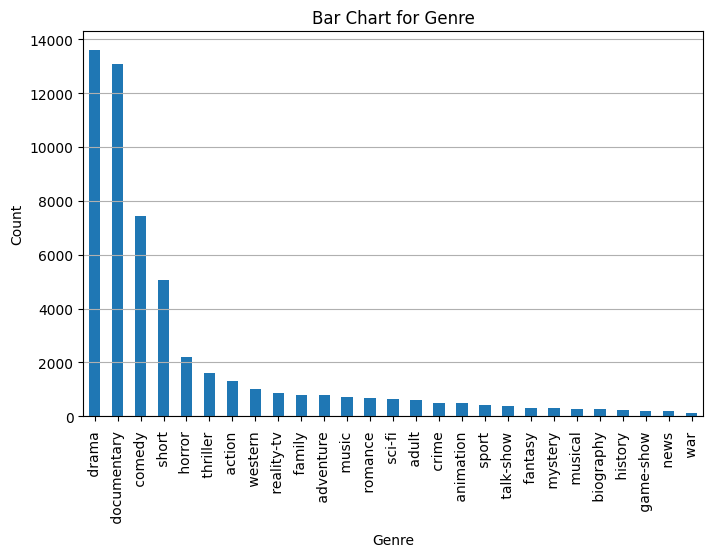

In [15]:
import matplotlib.pyplot as plt

def plot_bar_chart(df, column):
    # Group the data by the specified column and count occurrences
    counts = df[column].value_counts()

    # Create the bar chart
    plt.figure(figsize=(8, 5))  # Adjust the figure size if needed
    counts.plot(kind='bar')
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
    plt.grid(axis='y')  # Add grid lines to the y-axis
    plt.show()

# Example usage:
# Assuming 'data' is your DataFrame and 'Genre' is the column you want to plot
plot_bar_chart(train_df, 'Genre')

## **>>Text Vectorization**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

def add_vectorized_features(data, text_columns, method='tfidf', max_features=None):

    # Copy the original dataset
    new_data = data.copy()

    # Initialize vectorizer based on the specified method
    if method == 'count':
        vectorizer = CountVectorizer(max_features=max_features)
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer(max_features=max_features)
    else:
        raise ValueError("Invalid method. Use 'count' or 'tfidf'.")

    # Iterate over text columns and add vectorized features
    for column in text_columns:
        # Fit and transform the text data to create the feature matrix
        features = vectorizer.fit_transform(new_data[column])

        # Convert the feature matrix to a DataFrame
        feature_names = vectorizer.get_feature_names_out()
        feature_df = pd.DataFrame(features.toarray(), columns=feature_names)

        # Concatenate the original dataset with the new features
        new_data = pd.concat([new_data, feature_df], axis=1)

    return new_data

# Example usage:
# Assuming 'data' is your DataFrame and 'Description' is the text column to be vectorized
train_df = add_vectorized_features(train_df, ['Description'], method='count', max_features=1000)
test_df = add_vectorized_features(test_df, ['Description'], method='count', max_features=1000)

# Display the dataset with added vectorized features
print("Vectorized Dataset:")
train_df

Vectorized Dataset:


,ID,Title,Genre,Description,Year,10,20,30,abandon,abl,...,write,writer,written,wrong,year,yet,york,young,younger,youth
0,1,Oscar et la dame rose (2009),drama,listen convers doctor parent 10yearold oscar l...,2009.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,2,Cupid (1997),thriller,brother sister past incestu relationship curre...,1997.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,3,"Young, Wild and Wonderful (1980)",adult,bu empti student field trip museum natur histo...,1980.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,4,The Secret Sin (1915),drama,help unemploy father make end meet edith twin ...,1915.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.102204,0.0,0.0,0.0,0.000000,0.0,0.0
4,5,The Unrecovered (2007),drama,film titl refer unrecov bodi ground zero also ...,2007.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,shortliv nbc live sitcom center bonino worldfa...,1953.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
54210,54211,Dead Girls Don't Cry (????),horror,next gener exploit sister kapa bay soror hous ...,2016.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.100246,0.0,0.0
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt standup comedi grow face fear ...,2008.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
54212,54213,Make Your Own Bed (1944),comedy,walter vivian live countri difficult time keep...,1944.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [17]:
from sklearn.preprocessing import LabelEncoder

def label_encode_genre(data):
    # Copy the original dataset
    encoded_data = data.copy()
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    # Fit and transform the 'Genre' column
    encoded_data['Genre'] = label_encoder.fit_transform(encoded_data['Genre'])
    return encoded_data

# Example usage:
# Assuming 'data' is your DataFrame
train_df = label_encode_genre(train_df)

In [18]:
def drop_columns(data, columns_to_drop):
    # Copy the original dataset
    new_data = data.copy()
    # Drop the specified columns
    new_data = new_data.drop(columns=columns_to_drop,axis=1)
    return new_data

columns_to_drop = ['ID', 'Title', 'Description']  # Example list of columns to drop
train_df = drop_columns(train_df, columns_to_drop)

In [19]:
X = train_df.drop(columns=['Genre'])
y = train_df['Genre']

# **Model Training and Building**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def evaluate_model_with_split(model, X, y, test_size=0.2, random_state=None):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    return {'Accuracy': accuracy}

# **Random Forest Classifier**

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Evaluate the model with data splitting, training, prediction, and evaluation
evaluation_results = evaluate_model_with_split(rf_model, X, y, test_size=0.2, random_state=42)
# Display the evaluation results
accuracy_rf=evaluation_results['Accuracy']
print("Evaluation Results:")
print(f"Accuracy: {accuracy_rf}")

Evaluation Results:
Accuracy: 0.49995388730056256


# **XGB Classifier**

In [27]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(random_state=42)

# Evaluate the model with data splitting, training, prediction, and evaluation
evaluation_results = evaluate_model_with_split(xgb_model, X, y, test_size=0.2, random_state=42)

# Display the evaluation results
accuracy_xgb = evaluation_results['Accuracy']
print("Evaluation Results:")
print(f"Accuracy: {accuracy_xgb}")


Evaluation Results:
Accuracy: 0.5395185834178733


# **LGBM Classifier**

In [28]:
from lightgbm import LGBMClassifier

# Initialize the model
lgbm_model = LGBMClassifier(random_state=42)

# Evaluate the model with data splitting, training, prediction, and evaluation
evaluation_results = evaluate_model_with_split(lgbm_model, X, y, test_size=0.2, random_state=42)

# Display the evaluation results
accuracy_lgbm = evaluation_results['Accuracy']
print("Evaluation Results:")
print(f"Accuracy: {accuracy_lgbm}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.337950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 221305
[LightGBM] [Info] Number of data points in the train set: 43371, number of used features: 1001
[LightGBM] [Info] Start training from score -3.719098
[LightGBM] [Info] Start training from score -4.507936
[LightGBM] [Info] Start training from score -4.222348
[LightGBM] [Info] Start training from score -4.701195
[LightGBM] [Info] Start training from score -5.359426
[LightGBM] [Info] Start training from score -1.977365
[LightGBM] [Info] Start training from score -4.691094
[LightGBM] [Info] Start training from score -1.424434
[LightGBM] [Info] Start training from score -1.379561
[LightGBM] [Info] Start training from score -4.225497
[LightGBM] [Info] Start training from score -5.160093
[LightGBM] [Info] Start training from score -5.64

In [29]:
test_df.head()

,ID,Title,Description,Year,10,20,30,abandon,abl,abus,...,write,writer,written,wrong,year,yet,york,young,younger,youth
0,1,Edgar's Lunch (1998),lr brane love life car apart job especi girlfr...,1998.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,2,La guerra de papá (1977),spain march 1964 quico naughti child three bel...,1977.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.178851,0.0,0.0,0.0,0.0,0.0
2,3,Off the Beaten Track (2010),one year life albin famili shepherd north tran...,2010.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.111123,0.0,0.0,0.0,0.0,0.0
3,4,Meu Amigo Hindu (2015),father die hasnt spoken brother 10 year seriou...,2015.0,0.218214,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.107907,0.0,0.0,0.0,0.0,0.0
4,5,Er nu zhai (1955),known intern martial art superstar bruce lee a...,1955.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.165773,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [30]:
title=test_df["Title"]

In [32]:
columns_to_drop = ['ID', 'Title', 'Description']
test_df = drop_columns(test_df, columns_to_drop)

# **Making Predictions on Test DataSet using LGBM Classifier**

In [33]:
predictions = lgbm_model.predict(test_df)

In [34]:
import pandas as pd

# Create a DataFrame with the IDs and predicted values
predictions_df = pd.DataFrame({'ID': title, 'Predicted_Genre': predictions})
predictions_df.head()

,ID,Predicted_Genre
0,Edgar's Lunch (1998),21
1,La guerra de papá (1977),8
2,Off the Beaten Track (2010),5
3,Meu Amigo Hindu (2015),5
4,Er nu zhai (1955),8


In [35]:
# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)